In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/dmarszalik/foody/main/epi_r.csv')

In [6]:
df.head(-5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20042,Date Purée,2.500,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20043,Crispy Salt and Pepper Chicken with Caramelize...,5.000,1086.0,78.0,70.0,1323.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20044,Orange-Tini,3.750,84.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20045,Blueberry Compote,3.750,182.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calories variable analysis

In [7]:
df['calories'].describe()

count    1.593500e+04
mean     6.322958e+03
std      3.590460e+05
min      0.000000e+00
25%      1.980000e+02
50%      3.310000e+02
75%      5.860000e+02
max      3.011122e+07
Name: calories, dtype: float64

<Axes: ylabel='calories'>

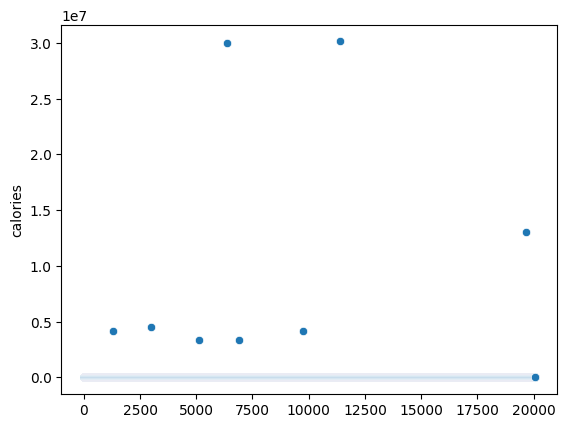

In [37]:
sns.scatterplot(data=df, x=df['calories'].index, y='calories')

/var/folders/mp/mpgc14lx6b9f41xmhqs4mxc80000gn/T/ipykernel_7371/3396695637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['calories'])


<Axes: xlabel='calories', ylabel='Density'>

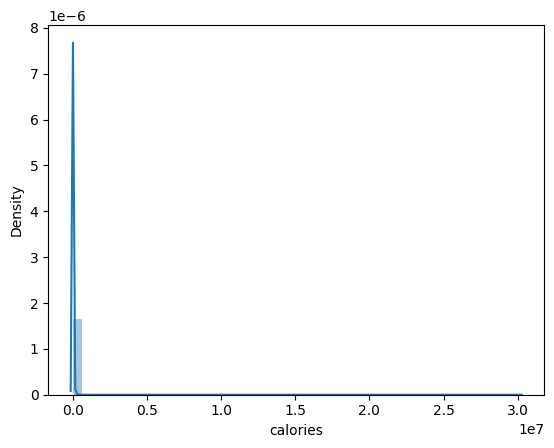

In [38]:
sns.distplot(df['calories'])

From plots above we can observe that there is a problem with just a few values exceeding the rest extremely. I'll deal with it 

In [45]:
df2 = df.loc[(df['calories'] < 50000)]

<Axes: ylabel='calories'>

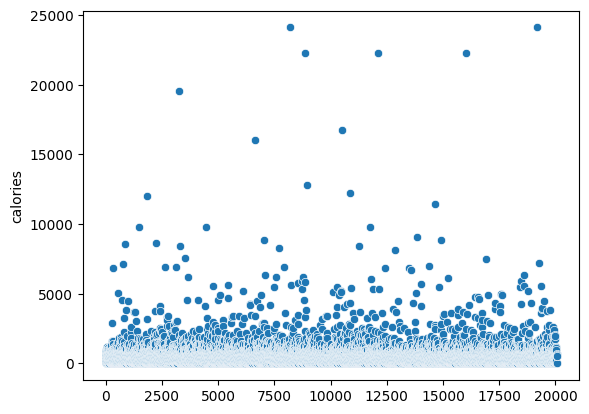

In [46]:
sns.scatterplot(data=df2, x=df2['calories'].index, y='calories')

Dealing with outlayers using one and a half interquartile range method
What is also important it is known that it is impossible for meals to have negative amont of callories so my low boundary is 0

In [55]:
q1 = df2['calories'].quantile(0.25)
q3 = df2['calories'].quantile(0.75)
interquartile_range = np.abs(q1-q3)

boundary_low = df2['calories'].mean()-1.5*interquartile_range
boundary_high = df2['calories'].mean()+1.5*interquartile_range

df3 = df2.loc[(df2['calories'] > 0)&(df['calories'] < boundary_high)]
df3.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,14726.000000,14726.000000,14686.000000,14665.000000,14724.000000,14726.000000,14726.000000,14726.000000,14726.000000,14726.000000,...,14726.000000,14726.000000,14726.000000,14726.000000,14726.000000,14726.000000,14726.000000,14726.000000,14726.000000,14726.000000
mean,3.734594,368.805718,14.864973,20.023253,556.301548,0.000272,0.000068,0.000815,0.001358,0.000272,...,0.001358,0.022885,0.000068,0.000340,0.014532,0.000136,0.000340,0.001426,0.000883,0.016773
std,1.309209,241.327727,18.348934,17.558299,2560.147372,0.016479,0.008241,0.028536,0.036829,0.016479,...,0.036829,0.149541,0.008241,0.018424,0.119674,0.011654,0.018424,0.037737,0.029700,0.128424
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,189.000000,3.000000,7.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,306.000000,7.000000,16.000000,253.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,510.000000,21.000000,28.000000,626.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1082.000000,161.000000,109.000000,132220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='calories'>

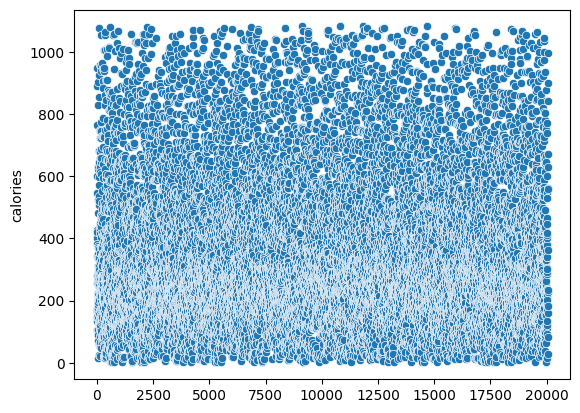

In [56]:
sns.scatterplot(data=df3, x=df3['calories'].index, y='calories')

/var/folders/mp/mpgc14lx6b9f41xmhqs4mxc80000gn/T/ipykernel_7371/1233095144.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['calories'])


<Axes: xlabel='calories', ylabel='Density'>

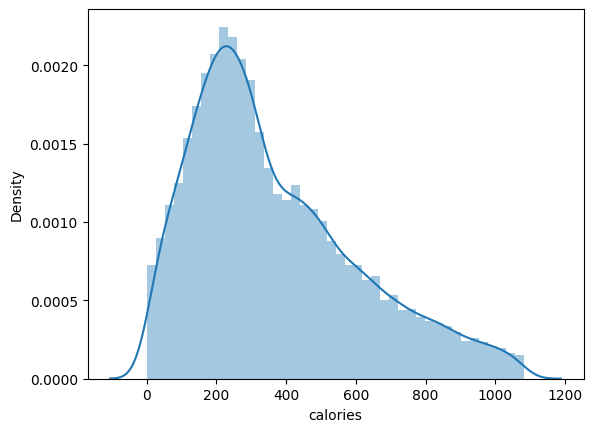

In [57]:
sns.distplot(df3['calories'])

In [58]:
df3['calories'].skew()

0.8346809556890524

In [59]:
df3['calories'].kurtosis()

0.028720980561859122

A zatem rozkład nie jest normalny